In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0-alpha0'

In [11]:
import tensorflow.keras.layers as tkl
import tensorflow.keras as tk
import tensorflow as tf
import os
import numpy as np

In [12]:
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tk.callbacks.TensorBoard(log_dir=logdir)
os.mkdir(logdir)

In [13]:
n_history=7
n_market=2
n_portfolio=3

In [14]:
def create_convnet_actor(n_filters, n_history, n_market, n_portfolio):
    inputs = tk.Input(shape=[n_history,n_market,1])
    conv = tkl.Conv2D(activation=None, filters=n_filters, padding='valid', kernel_size=[n_history,n_market])
    reshape = tkl.Reshape([n_filters])    
    hidden1 = tkl.Dense(units=16, activation='relu')
    hidden2 = tkl.Dense(units=8, activation='relu')
    out = tkl.Dense(units=n_portfolio, activation='softmax')

    model = tk.Model(inputs, out(hidden2(hidden1(reshape(conv(inputs))))))
    return model

actor = create_convnet_actor(n_filters = 10, n_history=7, n_market=2, n_portfolio=3)

In [15]:
actor.compile('sgd', 'mse')

In [31]:
train_x = np.random.random([10000,7,2,1]).astype(np.float32)

In [32]:
def heuristic_hold(x):
    batch_size = len(x)
    x1 = np.squeeze(x)
    diffs = x1[:,-1,:] - x1[:,0,:]
    diffs_and_cash = np.hstack([np.zeros([batch_size, 1], dtype=np.float32), diffs])
    max_diffs = np.max(diffs_and_cash, axis=-1)
    labels = ((diffs_and_cash - max_diffs.reshape([batch_size,1])) == 0).astype(np.float32)
    return labels

In [33]:
train_y = heuristic_hold(train_x)

In [34]:
eval_x = np.random.random([100, n_history, n_market, 1]).astype(np.float32)
eval_y = heuristic_hold(eval_x)

In [39]:
len(train_x)

10000

In [41]:
history = actor.fit(train_x, train_y, epochs=300, verbose=0,
         #batch_size=len(train_x), 
         validation_data=(eval_x, eval_y))

In [42]:
actor(eval_x)[5]

<tf.Tensor: id=596430, shape=(3,), dtype=float32, numpy=array([0.0178176 , 0.00098922, 0.9811932 ], dtype=float32)>

In [44]:
eval_x[5].T

array([[[0.04362595, 0.98318356, 0.11574962, 0.7187048 , 0.14904986,
         0.6689669 , 0.02822683],
        [0.0882563 , 0.04991923, 0.49425742, 0.24416828, 0.49891153,
         0.5845887 , 0.883154  ]]], dtype=float32)

In [45]:
eval_y[5]

array([0., 0., 1.], dtype=float32)

In [46]:
history

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

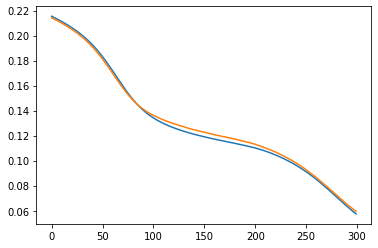

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [49]:
history.history

{'loss': [0.21542510924339295,
  0.21501886172294618,
  0.21461064710617064,
  0.21419674673080444,
  0.21377755885124206,
  0.21335196237564086,
  0.2129196361064911,
  0.21248198499679566,
  0.21203995962142944,
  0.2115936045885086,
  0.21114257469177247,
  0.21068458518981933,
  0.21021759853363037,
  0.20974296193122863,
  0.2092596909046173,
  0.20876910452842712,
  0.20827044711112977,
  0.2077644751548767,
  0.20724925179481507,
  0.20672524154186248,
  0.20618960514068604,
  0.20564363412857056,
  0.20508702762126924,
  0.20452065186500548,
  0.2039427133321762,
  0.20335299227237702,
  0.20275067110061645,
  0.20213496866226197,
  0.20150583717823028,
  0.2008621328830719,
  0.20020180611610414,
  0.19952697134017944,
  0.198835631275177,
  0.1981284203529358,
  0.19740408346652985,
  0.19666120209693908,
  0.19590013659000396,
  0.19511959357261657,
  0.19432035179138182,
  0.1934991649866104,
  0.19265878324508667,
  0.19179808418750763,
  0.19091644549369813,
  0.190013057